<h1 align='center'>Linear Regression using TensorFlow</h1>
<h2 align='center'>June 7, 2017</h2>
<h3 align='center'>By Rajat V D</h3>

## Introduction
In this notebook, we will be exploring the concept of Regression, and in particular, Linear Regression. Regression is basically a process for finding a best fit model given some data. Specifically, we can represent the model using some parameters, and our goal is to minimize some notion of fitting error between the model and the data, over the range of values of the parameters. Let us represent our data as an input-output pair, where the input is denoted by $x$ and the output by $y$. Note that these could be, in general, vectors of any size. We represent the parameters of our model also as a vector, say, $\beta$. So now we can express our goal as the following:

Ideally, we would like to find $\beta$ such that

$$f(x,\beta) = y$$

For all data points $(x,y)$, where the function $f$ characterizes our model. But this is almost always impossible, because these set of equations would be over-determined because the number of data points would greatly exceed the number of parameters we need to find.

Instead, let us define a measure of how bad a given model is, with respect to the data we have. Let us call this the loss function. One natural loss function is to simply measure the distance between what our model predicts for a given $x$ and what the data says should be the value corresponding to that $x$, and sum this up over all our data points. It is convenient to use the square of the distance instead of the actual distance itself. Then, our goal becomes minimizing this sum of square distance over the range of parameters, $\beta$. Therefore, this method usually goes by the name, least squares regression. So our problem becomes:


$$minimize \space \lVert y - f(x,\beta)\rVert^2 \space over \space \beta$$

## Linear Regression
In linear regression, the model which we will use will be a simple linear model. So, our predicted $y'$ for a given $x$ will be of the form

$$y' = Wx + b$$

where $W$ is called the weight matrix and $b$ is called the bias vector. The numbers in $W$ and $b$ act like the $\beta$. Our loss is therefore

$$\lVert y - y' \rVert ^ 2$$

To minimize our loss over the parameters $W$ and $b$, we use a method called stochastic gradient descent. In simple terms, this means that we analytically calculate the derivative of the loss with respect to each parameter, and update the weights and biases in the direction negative of their corresponding derivatives. The derivatives are found using a method called backpropagation, which I will not cover in this notebook. After we update the weights, we need to recalculate the gradients, and update the weights again. The amount by which we update the weights is governed by a hyperparameter called the stepsize. A smaller stepsize means the optimal point is reached slower, but it is more accurate, but a larger stepsize means that the solution is reached faster, but it will be less accurate.

In [1]:
# Imports
import tensorflow as tf
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
xIn,yIn = np.loadtxt("twoDimData.dat",unpack = True) # Get our sample data from a file

In [3]:
# Setup our simple tensorflow graph
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_uniform(shape = [1],minval = 0,maxval = 100))
b = tf.Variable(tf.random_uniform(shape = [1],minval = -100,maxval = 100))
yPred = W*x + b
loss = tf.reduce_sum(tf.square(y - yPred))

In [4]:
# Setup the training
LEARNING_RATE = 0.0000015
train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

In [5]:
# Initialize the session and variables
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

<IPython.core.display.Javascript object>


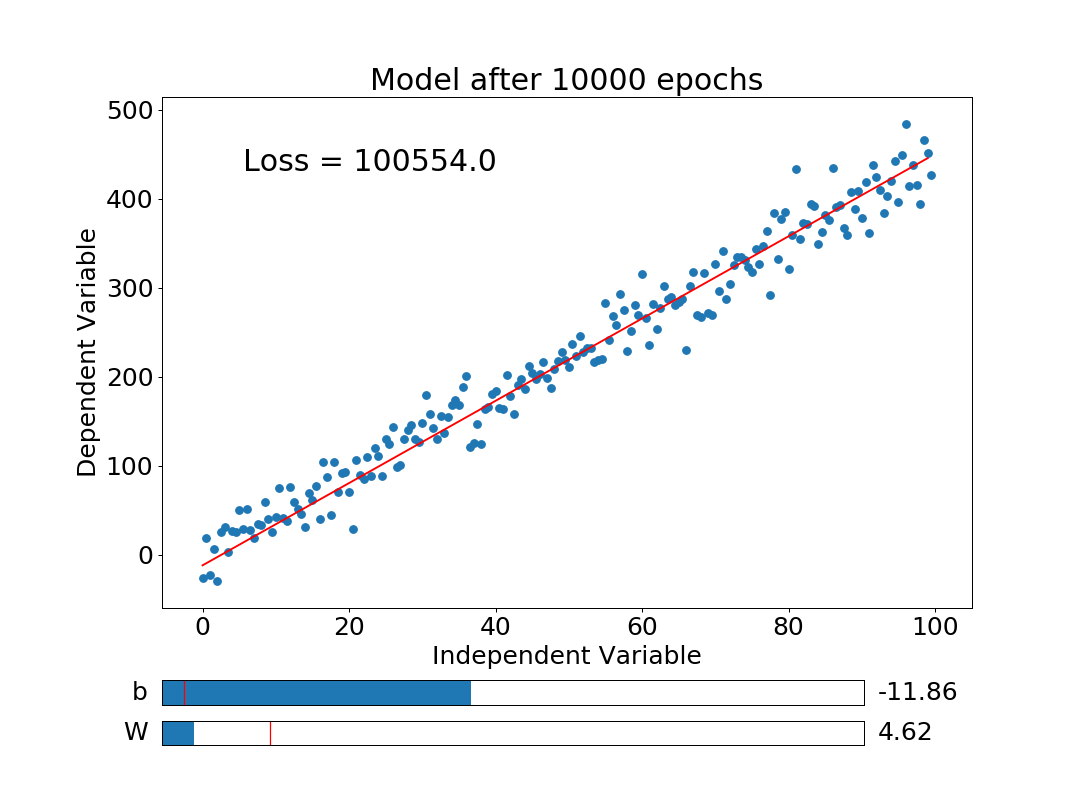

In [6]:
# Setup dynamic plotting
%matplotlib notebook
fig = figure(figsize=(12,9))
rcParams["font.size"]=20
ax = subplot(111)
subplots_adjust(left=0.15, bottom=0.25)

sess.run(init)
Wax = axes([0.15, 0.08, 0.65, 0.03])
Wslid = Slider(Wax, 'W', 0, 100.0, valinit=sess.run(W))
bax = axes([0.15, 0.13, 0.65, 0.03])
bslid = Slider(bax, 'b', -100, 100.0, valinit=sess.run(b))

ax.set_title("Model after 0 epochs")
ax.set_xlabel("Independent Variable")
ax.set_ylabel("Dependent Variable")
ax.scatter(xIn,yIn)


ion()
fig.show()

The above plot is a dynamic plot which shows how the predicted linear relation changes as the parameters W and b change. Since our data consists of simple two dimensional points, the prediction is just a line in the plane. This makes the model easier to visualize. Running the next cell will train the model and we can see the above graph dynamically change as the parameters improve.

In [7]:
# Run this cell to retrain the model from scratch for 10000 epochs
EPOCHS = 10000
#batchSize = 50
sess.run(init)
losses = []
for i in range(EPOCHS+1):
    #ind = random.randint(0,len(xIn)-batchSize)
    #sess.run(train_step,feed_dict={x:xIn[ind:ind+batchSize], y:yIn[ind:ind+batchSize]}) 
    sess.run(train_step,feed_dict={x:xIn, y:yIn}) # Train
    m = sess.run(W)
    c = sess.run(b)
    l = sess.run(loss,feed_dict={x:xIn, y:yIn})
    losses.append(l) # Keep a track of the loss
    Wslid.set_val(m)
    bslid.set_val(c)
    if i%100==0:
        # Update the plot every 100 epohcs
        ax.clear()
        ax.set_title("Model after "+str(i)+" epochs")
        ax.set_xlabel("Independent Variable")
        ax.set_ylabel("Dependent Variable")
        ax.scatter(xIn,yIn)
        ax.plot(range(100),[m*i+c for i in range(100)], color = 'r') # Plot the prediction line
        ax.annotate('Loss = '+str(l), xy=(0.1, 0.9), xycoords='axes fraction', fontsize=24,
                horizontalalignment='left', verticalalignment='top')
        fig.canvas.draw()

The cell below plots the loss as a function of training steps. You can use the interactive nature of the plot to zoom in on regions of interest, or modify the y-limits to see the more interesting part of the plot. As you can see, it gradually decreases. This indicates that the gradient descent optimizer is working, and our model's prediction gradually improves.

<IPython.core.display.Javascript object>


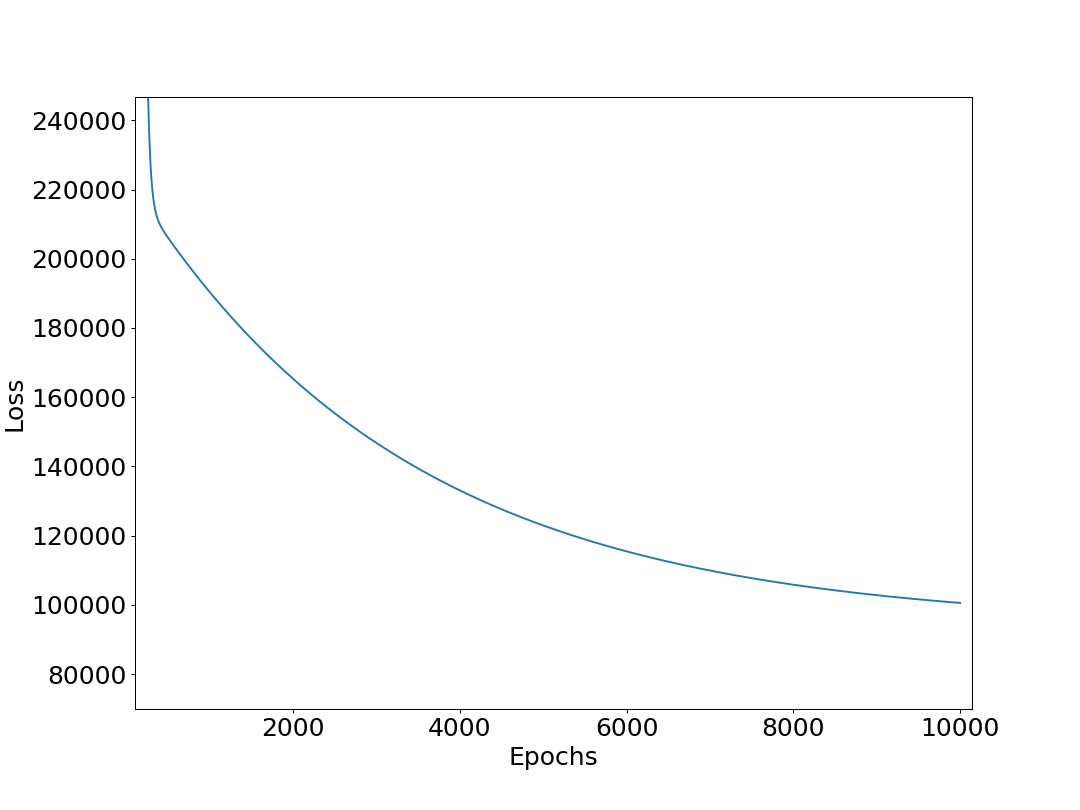

In [8]:
# Plot the loss over the epochs
figure(figsize=(12,9))
plot(losses)
xlabel("Epochs")
ylabel("Loss")